# Tiến hành làm sạch dữ liệu cổ phiếu Amazon sau khi thu thập

    Import thư viện

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path 
import warnings
warnings.filterwarnings('ignore')

    Đọc dữ liệu thô từ file raw_data.csv

In [8]:
data = pd.read_csv('./raw data/raw_data.csv').iloc[::-1]
data

,Date,Open,High,Low,Close,Adj Close,Volume
2243,Dec 11 2015,32.56,32.89,31.98,32.01,32.01,109488000
2242,Dec 14 2015,32.09,32.93,31.76,32.90,32.90,86594000
2241,Dec 15 2015,33.25,33.58,32.87,32.93,32.93,95068000
2240,Dec 16 2015,33.18,33.87,32.97,33.79,33.79,79290000
2239,Dec 17 2015,34.00,34.13,33.53,33.53,33.53,73632000
...,...,...,...,...,...,...,...
4,Nov 5 2024,196.04,199.82,195.99,199.50,199.50,30564800
3,Nov 6 2024,200.01,207.55,199.14,207.09,207.09,72292200
2,Nov 7 2024,207.44,212.25,207.19,210.05,210.05,52878400
1,Nov 8 2024,209.72,209.96,207.44,208.18,208.18,36038600


    Kiểm tra thông tin dữ liệu

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 2243 to 0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2244 non-null   object 
 1   Open       2244 non-null   float64
 2   High       2244 non-null   float64
 3   Low        2244 non-null   float64
 4   Close      2244 non-null   float64
 5   Adj Close  2244 non-null   float64
 6   Volume     2244 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 122.8+ KB


    Loại bỏ thành phần không mong muốn

In [10]:
data.drop(['Adj Close'], axis=1, inplace=True)
data

,Date,Open,High,Low,Close,Volume
2243,Dec 11 2015,32.56,32.89,31.98,32.01,109488000
2242,Dec 14 2015,32.09,32.93,31.76,32.90,86594000
2241,Dec 15 2015,33.25,33.58,32.87,32.93,95068000
2240,Dec 16 2015,33.18,33.87,32.97,33.79,79290000
2239,Dec 17 2015,34.00,34.13,33.53,33.53,73632000
...,...,...,...,...,...,...
4,Nov 5 2024,196.04,199.82,195.99,199.50,30564800
3,Nov 6 2024,200.01,207.55,199.14,207.09,72292200
2,Nov 7 2024,207.44,212.25,207.19,210.05,52878400
1,Nov 8 2024,209.72,209.96,207.44,208.18,36038600


    Lưu dữ liệu sau khi làm sạch vào file csv mới có tên là : clean_data.csv

In [11]:
filepath = Path('./clean data/clean_data.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
data.to_csv(filepath,index=False)  

    Vẽ giá cổ phiếu Amazon cho toàn bộ thời gian 2017-2022

Text(0.5, 1.0, 'Giá cổ phiếu Amazon cho toàn bộ thời gian (2015 - 2024)')

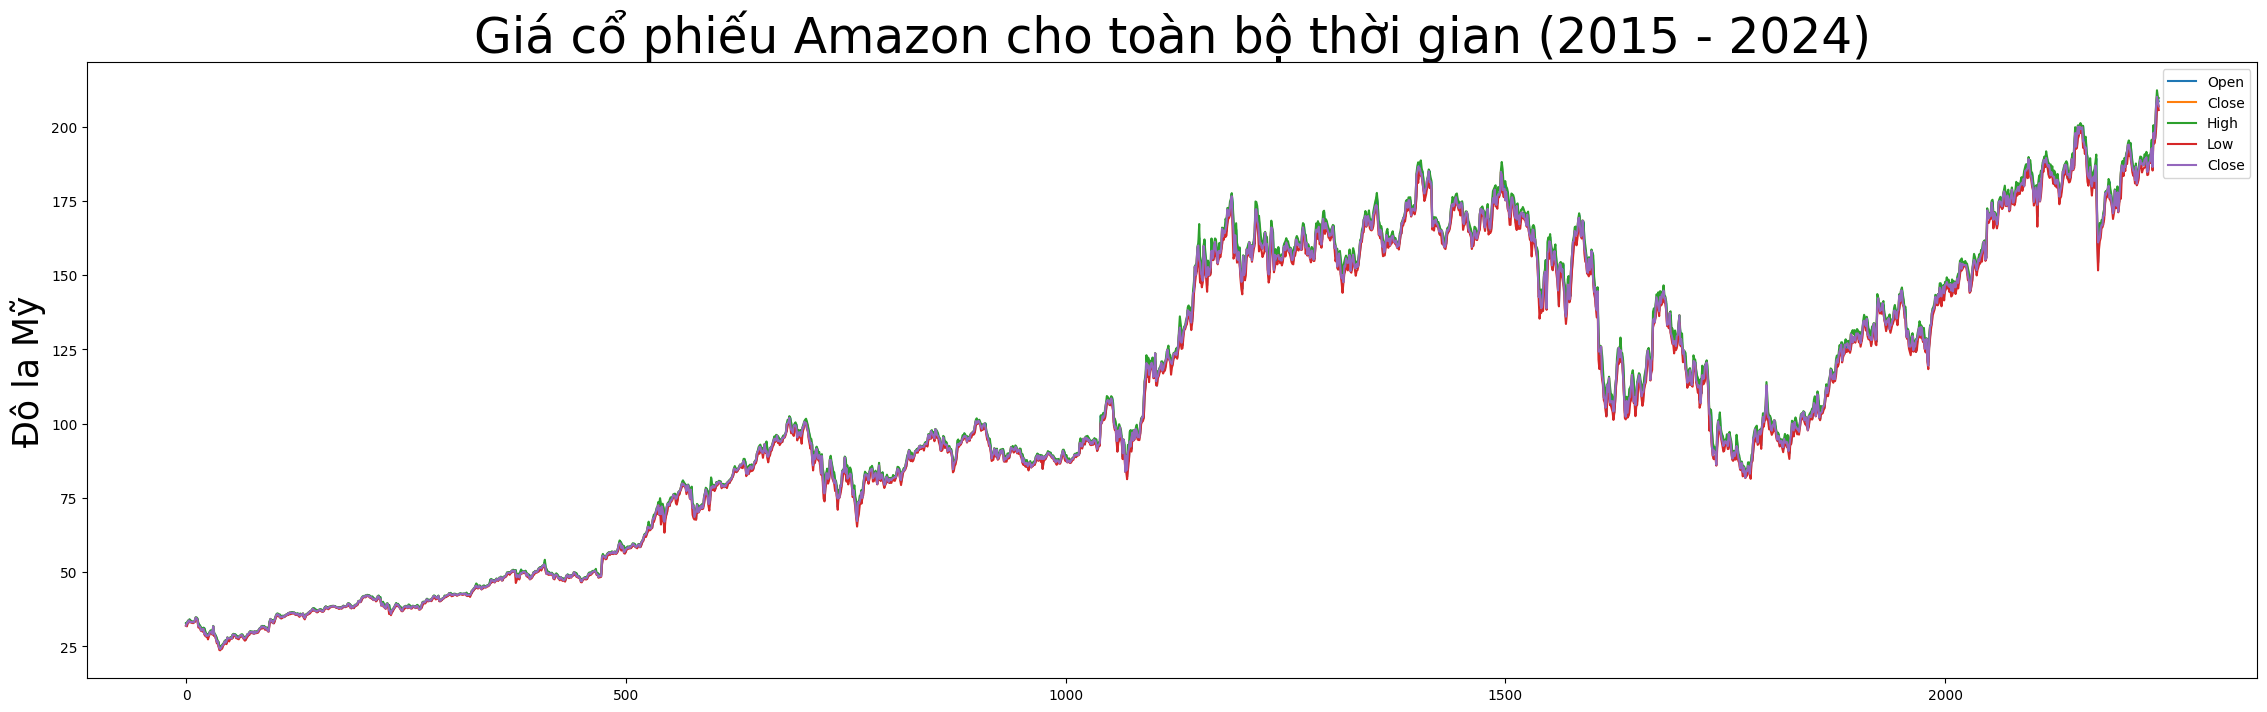

In [12]:
data_clean = pd.read_csv('./clean data/clean_data.csv')
data_clean[['Open', 'Close', 'High','Low','Close']].iloc[::-1].plot(figsize=(28,8))
plt.ylabel('Đô la Mỹ', fontsize = 25)
plt.title("Giá cổ phiếu Amazon cho toàn bộ thời gian (2015 - 2024)", fontsize=35)

    + Nếu chỉ sử dụng các biến có trong dataset thì rất khó để dự đoán vì sự biến thiên không nhiều. Bước tiếp theo chúng ta sẽ tạo thêm các đặc trưng mới.

    + Không thể xử lý ngoại lệ hoặc giảm chiều cho bộ dataset này vì sẽ làm mất tính biến thiên của thời gian